## data loading 

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import squarify

In [2]:
df=pd.read_excel('Decath_logistic data.xlsx')

In [3]:
df_label=df['Y_var'].copy()

In [4]:
df_label

0        1
1        0
2        1
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: Y_var, Length: 20000, dtype: int64

In [5]:
df.columns

Index(['LoyaltyID', 'no_of_trans_1', 'total_qty_1', 'total_amt_1',
       'avg_spend_per_trans_1', 'avg_qty_per_trans_1', 'min_total_qty_1',
       'max_total_qty_1', 'min_total_amt_1', 'max_total_amt_1',
       ...
       'dist_sport_6to9', 'dist_sport_9to12', 'dist_sport_1to6',
       'dist_sport_3to9', 'dist_sport_6to12', 'IsOnlineCustomer', 'OptIn',
       'Gender', 'IsSportUser', 'Y_var'],
      dtype='object', length=162)

In [6]:
df_numeric=df[df.columns[1:-5]].copy()

In [7]:
df_cat=df[df.columns[-5:-1]].copy()

## woe and iv for categorical variables.

In [8]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(df_cat, df_label)

WOE(mono_custom_binning={'Gender': array([0, 1], dtype=int64)},
    woe_bins={'Gender': {0: -0.09354265104090094, 1: 0.01740044662076962},
              'IsOnlineCustomer': {'N': -0.06132211261483906,
                                   'Y': 1.2962058657208042},
              'IsSportUser': {'N': -0.5212541803760694, 'Y': 1.770738749691537},
              'OptIn': {'N': -0.32689605354362106, 'Y': 0.3198691353222821}})

In [9]:
clf.iv_df

,Variable_Name,Information_Value
2,IsSportUser,0.859450
3,OptIn,0.103662
1,IsOnlineCustomer,0.078976
0,Gender,0.001627


## outliers for numerical variables

In [10]:
outliers={}
for cols in df_numeric.columns:
    for percentile in [1,5,25,75,95,99]:
        if cols not in outliers:
            outliers[cols]={}
        outliers[cols][percentile]=np.percentile(df_numeric[cols],percentile)

In [11]:
outliers

{'no_of_trans_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 1.0, 99: 2.0},
 'total_qty_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 5.0, 99: 13.0},
 'total_amt_1': {1: 0.0,
  5: 0.0,
  25: 0.0,
  75: 0.0,
  95: 2297.0,
  99: 7091.049999999992},
 'avg_spend_per_trans_1': {1: 0.0,
  5: 0.0,
  25: 0.0,
  75: 0.0,
  95: 2049.4499999999935,
  99: 6437.539999999914},
 'avg_qty_per_trans_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 4.0, 99: 11.0},
 'min_total_qty_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 4.0, 99: 10.0},
 'max_total_qty_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 5.0, 99: 12.0},
 'min_total_amt_1': {1: 0.0,
  5: 0.0,
  25: 0.0,
  75: 0.0,
  95: 1946.0499999999993,
  99: 6117.759999999878},
 'max_total_amt_1': {1: 0.0,
  5: 0.0,
  25: 0.0,
  75: 0.0,
  95: 2200.0499999999993,
  99: 6696.019999999997},
 'min_dist_items_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 4.0, 99: 9.0},
 'max_dist_items_1': {1: 0.0, 5: 0.0, 25: 0.0, 75: 0.0, 95: 4.0, 99: 10.0},
 'avg_dist_items_per_trans_1': {1: 

In [12]:
#columns=['MonetaryValue','Discount','EARN','SPENT','Recency','license_time','offer_time']
for col in df_numeric.columns:
    percentiles = df_numeric[col].quantile([0.01,0.99]).values
    df_numeric[col] = np.clip(df_numeric[col], percentiles[0], percentiles[1])

## Variable clustering for numeric variables

In [13]:
from varclushi import VarClusHi

In [14]:
df_numeric

,no_of_trans_1,total_qty_1,total_amt_1,avg_spend_per_trans_1,avg_qty_per_trans_1,min_total_qty_1,max_total_qty_1,min_total_amt_1,max_total_amt_1,min_dist_items_1,...,avg_dist_items_per_trans_1to6,avg_dist_items_per_trans_3to9,avg_dist_items_per_trans_6to12,dist_sport_1to3,dist_sport_3to6,dist_sport_6to9,dist_sport_9to12,dist_sport_1to6,dist_sport_3to9,dist_sport_6to12
0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,...,0.0,1.333333,1.0,0.0,0.5,1.0,1.0,0.0,0.5,1.0
1,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,...,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,...,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,5,2106.0,2106.0,5.0,5,5,2106.0,2106.0,5,...,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19996,1,2,3398.0,3398.0,2.0,2,2,3398.0,3398.0,2,...,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19997,1,1,1499.0,1499.0,1.0,1,1,1499.0,1499.0,1,...,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19998,1,2,298.0,298.0,2.0,2,2,298.0,298.0,2,...,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
features=df_numeric[df_numeric.columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_numeric_norm=df_numeric.copy()
df_numeric_norm[df_numeric.columns]=features

In [16]:
df_numeric_norm

,no_of_trans_1,total_qty_1,total_amt_1,avg_spend_per_trans_1,avg_qty_per_trans_1,min_total_qty_1,max_total_qty_1,min_total_amt_1,max_total_amt_1,min_dist_items_1,...,avg_dist_items_per_trans_1to6,avg_dist_items_per_trans_3to9,avg_dist_items_per_trans_6to12,dist_sport_1to3,dist_sport_3to6,dist_sport_6to9,dist_sport_9to12,dist_sport_1to6,dist_sport_3to9,dist_sport_6to12
0,-0.415411,-0.323943,-0.293775,-0.295452,-0.331161,-0.329186,-0.327721,-0.290287,-0.295613,-0.334892,...,-0.422421,1.811834,0.738579,-0.417868,0.233847,0.876766,0.55898,-0.406459,0.300961,0.961277
1,-0.415411,-0.323943,-0.293775,-0.295452,-0.331161,-0.329186,-0.327721,-0.290287,-0.295613,-0.334892,...,-0.422421,-0.829155,-1.266894,-0.417868,-0.827420,-1.263218,0.55898,-0.406459,-0.801533,-1.217119
2,-0.415411,-0.323943,-0.293775,-0.295452,-0.331161,-0.329186,-0.327721,-0.290287,-0.295613,-0.334892,...,-0.422421,1.151587,0.738579,-0.417868,1.295114,0.876766,0.55898,-0.406459,1.403454,0.961277
3,-0.415411,-0.323943,-0.293775,-0.295452,-0.331161,-0.329186,-0.327721,-0.290287,-0.295613,-0.334892,...,-0.422421,-0.829155,-1.266894,-0.417868,-0.827420,-1.263218,0.55898,-0.406459,-0.801533,-1.217119
4,-0.415411,-0.323943,-0.293775,-0.295452,-0.331161,-0.329186,-0.327721,-0.290287,-0.295613,-0.334892,...,-0.422421,1.151587,0.738579,-0.417868,1.295114,0.876766,0.55898,-0.406459,1.403454,0.961277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.956333,2.061145,1.626231,1.841806,2.407459,2.582159,2.235405,1.975425,1.732249,2.962914,...,2.338567,1.151587,0.738579,2.541776,1.295114,0.876766,0.55898,2.724176,1.403454,0.961277
19996,1.956333,0.630092,2.804127,3.152982,0.764287,0.835352,0.697529,3.365406,2.976312,0.984230,...,2.338567,1.151587,0.738579,2.541776,1.295114,0.876766,0.55898,2.724176,1.403454,0.961277
19997,1.956333,0.153075,1.072839,1.225797,0.216563,0.253083,0.184904,1.322392,1.147770,0.324669,...,2.338567,1.151587,0.738579,2.541776,1.295114,0.876766,0.55898,2.724176,1.403454,0.961277
19998,1.956333,0.630092,-0.022093,0.006971,0.764287,0.835352,0.697529,0.030312,-0.008669,0.984230,...,2.338567,1.151587,0.738579,2.541776,1.295114,0.876766,0.55898,2.724176,1.403454,0.961277


In [17]:
var_clus_model= VarClusHi(df_numeric_norm,maxeigval2=1, maxclus=6)
var_clus_model.varclus()

In [18]:
var_clus_model.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,27,22.449082,2.314852,0.831447
1,1,39,32.974353,3.099006,0.845496
2,2,25,17.081877,2.707614,0.683275
3,3,27,23.755752,1.645458,0.879843
4,4,14,11.194486,1.323248,0.799606
5,5,24,15.440620,3.257128,0.643359


In [19]:
writer = pd.ExcelWriter("eda.xlsx")
var_clus_model.rsquare.to_excel(writer,sheet_name="Variable Clustering")
writer.save()

In [20]:
var_res=['avg_dist_items_per_trans_6to9',
'avg_qty_per_trans_6to9',
'max_dist_items_6to9',
'avg_dist_items_per_trans_1to3',
'avg_qty_per_trans_1to3',
'avg_dist_items_per_trans_1to6',
'max_total_qty_3',
'max_dist_items_3',
'avg_qty_per_trans_3',
'avg_dist_items_per_trans_3to6',
'max_dist_items_3to6',
'avg_qty_per_trans_3to6',
'avg_dist_items_per_trans_9to12',
'avg_qty_per_trans_9to12',
'max_dist_items_9to12',
'max_dist_items_12',
'avg_dist_items_per_trans_12',
'avg_qty_per_trans_12']

In [21]:
df_var_res=df_numeric_norm[var_res].copy()
df_var_res

,avg_dist_items_per_trans_6to9,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_dist_items_per_trans_1to3,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,avg_dist_items_per_trans_3to6,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
0,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,0.013884,0.100836,0.077839,1.831053,1.233031,1.819049,0.43089,0.432786,0.498074,-0.668117,-0.748869,-0.742773
1,-1.294027,-1.283719,-1.286955,-0.427343,-0.425118,-0.422421,-0.558043,-0.575236,-0.564875,-0.843511,-0.838491,-0.838393,0.43089,0.432786,0.498074,0.599850,1.014745,0.704089
2,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,-0.272080,-0.237200,-0.243518,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,-0.921710,-0.909198,-0.874306
3,-1.294027,-1.283719,-1.286955,-0.427343,-0.425118,-0.422421,-0.558043,-0.575236,-0.564875,-0.843511,-0.838491,-0.838393,0.43089,0.432786,0.498074,-0.160930,0.052773,0.177957
4,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,1.729662,2.129054,2.005981,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,0.853443,1.335402,0.967155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.871773,1.114945,1.041910,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,0.092663,0.373430,0.177957
19996,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.013884,0.100836,0.077839,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,-0.668117,-0.588541,-0.611240
19997,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,-0.272080,-0.237200,-0.243518,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,-0.921710,-0.909198,-0.874306
19998,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.013884,0.100836,0.077839,1.162412,1.233031,1.154688,0.43089,0.432786,0.498074,-0.668117,-0.588541,-0.611240


In [22]:
df_final=df_var_res.copy()
df_cat.drop('Gender',axis=1,inplace=True)
df_final[df_cat.columns]=df_cat[df_cat.columns]
df_final

,avg_dist_items_per_trans_6to9,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_dist_items_per_trans_1to3,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,avg_dist_items_per_trans_3to6,...,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12,IsOnlineCustomer,OptIn,IsSportUser
0,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,0.013884,0.100836,0.077839,1.831053,...,1.819049,0.43089,0.432786,0.498074,-0.668117,-0.748869,-0.742773,N,N,N
1,-1.294027,-1.283719,-1.286955,-0.427343,-0.425118,-0.422421,-0.558043,-0.575236,-0.564875,-0.843511,...,-0.838393,0.43089,0.432786,0.498074,0.599850,1.014745,0.704089,N,N,N
2,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,-0.272080,-0.237200,-0.243518,1.162412,...,1.154688,0.43089,0.432786,0.498074,-0.921710,-0.909198,-0.874306,N,Y,Y
3,-1.294027,-1.283719,-1.286955,-0.427343,-0.425118,-0.422421,-0.558043,-0.575236,-0.564875,-0.843511,...,-0.838393,0.43089,0.432786,0.498074,-0.160930,0.052773,0.177957,N,N,N
4,0.744610,0.741818,0.815481,-0.427343,-0.425118,-0.422421,1.729662,2.129054,2.005981,1.162412,...,1.154688,0.43089,0.432786,0.498074,0.853443,1.335402,0.967155,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.871773,1.114945,1.041910,1.162412,...,1.154688,0.43089,0.432786,0.498074,0.092663,0.373430,0.177957,N,N,N
19996,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.013884,0.100836,0.077839,1.162412,...,1.154688,0.43089,0.432786,0.498074,-0.668117,-0.588541,-0.611240,N,N,N
19997,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,-0.272080,-0.237200,-0.243518,1.162412,...,1.154688,0.43089,0.432786,0.498074,-0.921710,-0.909198,-0.874306,N,N,N
19998,0.744610,0.741818,0.815481,2.350623,2.350778,2.338567,0.013884,0.100836,0.077839,1.162412,...,1.154688,0.43089,0.432786,0.498074,-0.668117,-0.588541,-0.611240,N,N,N


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_final['IsOnlineCustomer'] = df_final['IsOnlineCustomer'].map({'N':0, 'Y':1})
df_final['OptIn'] = df_final['OptIn'].map({'N':0, 'Y':1})
df_final['IsSportUser'] = df_final['IsSportUser'].map({'N':0, 'Y':1})

In [24]:
vif_data = pd.DataFrame() 
vif_data["feature"] = df_final.columns

In [25]:
vif_data["VIF"] = [variance_inflation_factor(df_final.values, i) 
                          for i in range(len(df_final.columns))]

In [26]:
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
9,avg_dist_items_per_trans_3to6,174.252551
3,avg_dist_items_per_trans_1to3,133.279639
0,avg_dist_items_per_trans_6to9,109.924427
11,avg_qty_per_trans_3to6,93.535570
4,avg_qty_per_trans_1to3,87.285354
10,max_dist_items_3to6,71.495056
12,avg_dist_items_per_trans_9to12,68.627899
1,avg_qty_per_trans_6to9,65.405626
5,avg_dist_items_per_trans_1to6,47.054698
13,avg_qty_per_trans_9to12,43.908952


In [27]:
df_var_res.corr()

,avg_dist_items_per_trans_6to9,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_dist_items_per_trans_1to3,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,avg_dist_items_per_trans_3to6,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
avg_dist_items_per_trans_6to9,1.000000,0.991343,0.985599,0.309481,0.308221,0.305670,0.431968,0.445868,0.438033,0.616753,0.613129,0.612620,0.538252,0.534537,0.536912,0.057186,-0.013768,-0.006417
avg_qty_per_trans_6to9,0.991343,1.000000,0.976492,0.308213,0.308113,0.304520,0.435582,0.444543,0.442114,0.615177,0.611781,0.613979,0.533884,0.535916,0.532474,0.058515,-0.012352,-0.004393
max_dist_items_6to9,0.985599,0.976492,1.000000,0.310897,0.309634,0.306645,0.424838,0.438497,0.429733,0.616645,0.613732,0.612442,0.535311,0.531488,0.535352,0.031267,-0.016594,-0.008775
avg_dist_items_per_trans_1to3,0.309481,0.308213,0.310897,1.000000,0.993932,0.988823,0.329963,0.334721,0.318774,0.488662,0.485825,0.488173,0.175834,0.175466,0.178084,0.032504,-0.019899,-0.010814
avg_qty_per_trans_1to3,0.308221,0.308113,0.309634,0.993932,1.000000,0.982595,0.329114,0.334448,0.319296,0.485655,0.483032,0.487377,0.174838,0.176557,0.177174,0.032778,-0.019167,-0.009632
avg_dist_items_per_trans_1to6,0.305670,0.304520,0.306645,0.988823,0.982595,1.000000,0.337780,0.343662,0.325214,0.499456,0.495912,0.498464,0.173771,0.173096,0.175826,0.028034,-0.022012,-0.012443
max_total_qty_3,0.431968,0.435582,0.424838,0.329963,0.329114,0.337780,1.000000,0.961204,0.971912,0.663547,0.652513,0.668566,0.252012,0.256545,0.247080,0.438302,0.372055,0.408096
max_dist_items_3,0.445868,0.444543,0.438497,0.334721,0.334448,0.343662,0.961204,1.000000,0.939196,0.684959,0.672998,0.683373,0.261163,0.261035,0.255992,0.456012,0.390079,0.370885
avg_qty_per_trans_3,0.438033,0.442114,0.429733,0.318774,0.319296,0.325214,0.971912,0.939196,1.000000,0.671316,0.660780,0.676581,0.255671,0.260763,0.249757,0.414570,0.386501,0.424253
avg_dist_items_per_trans_3to6,0.616753,0.615177,0.616645,0.488662,0.485655,0.499456,0.663547,0.684959,0.671316,1.000000,0.991339,0.993863,0.349630,0.348809,0.352928,0.049243,-0.023398,-0.012091


In [28]:
writer = pd.ExcelWriter("eda.xlsx")
df_var_res.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

In [29]:
df_vif_corr=df_var_res.copy()

In [30]:
df_vif_corr.drop('avg_dist_items_per_trans_3to6',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_3to6',axis=1,inplace=True)

In [31]:
vif_data1 = pd.DataFrame() 
vif_data1["feature"] = df_final.columns
vif_data1["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

In [32]:
vif_data1.sort_values('VIF',ascending=False)

,feature,VIF
3,avg_dist_items_per_trans_1to3,132.484872
0,avg_dist_items_per_trans_6to9,109.842590
4,avg_qty_per_trans_1to3,85.336601
11,avg_dist_items_per_trans_9to12,68.598273
1,avg_qty_per_trans_6to9,64.546506
5,avg_dist_items_per_trans_1to6,46.791145
12,avg_qty_per_trans_9to12,43.835855
2,max_dist_items_6to9,42.838668
10,avg_qty_per_trans_3to6,40.233511
9,max_dist_items_3to6,38.576002


In [33]:
df_vif_corr.corr()

,avg_dist_items_per_trans_6to9,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_dist_items_per_trans_1to3,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
avg_dist_items_per_trans_6to9,1.000000,0.991343,0.985599,0.309481,0.308221,0.305670,0.431968,0.445868,0.438033,0.613129,0.612620,0.538252,0.534537,0.536912,0.057186,-0.013768,-0.006417
avg_qty_per_trans_6to9,0.991343,1.000000,0.976492,0.308213,0.308113,0.304520,0.435582,0.444543,0.442114,0.611781,0.613979,0.533884,0.535916,0.532474,0.058515,-0.012352,-0.004393
max_dist_items_6to9,0.985599,0.976492,1.000000,0.310897,0.309634,0.306645,0.424838,0.438497,0.429733,0.613732,0.612442,0.535311,0.531488,0.535352,0.031267,-0.016594,-0.008775
avg_dist_items_per_trans_1to3,0.309481,0.308213,0.310897,1.000000,0.993932,0.988823,0.329963,0.334721,0.318774,0.485825,0.488173,0.175834,0.175466,0.178084,0.032504,-0.019899,-0.010814
avg_qty_per_trans_1to3,0.308221,0.308113,0.309634,0.993932,1.000000,0.982595,0.329114,0.334448,0.319296,0.483032,0.487377,0.174838,0.176557,0.177174,0.032778,-0.019167,-0.009632
avg_dist_items_per_trans_1to6,0.305670,0.304520,0.306645,0.988823,0.982595,1.000000,0.337780,0.343662,0.325214,0.495912,0.498464,0.173771,0.173096,0.175826,0.028034,-0.022012,-0.012443
max_total_qty_3,0.431968,0.435582,0.424838,0.329963,0.329114,0.337780,1.000000,0.961204,0.971912,0.652513,0.668566,0.252012,0.256545,0.247080,0.438302,0.372055,0.408096
max_dist_items_3,0.445868,0.444543,0.438497,0.334721,0.334448,0.343662,0.961204,1.000000,0.939196,0.672998,0.683373,0.261163,0.261035,0.255992,0.456012,0.390079,0.370885
avg_qty_per_trans_3,0.438033,0.442114,0.429733,0.318774,0.319296,0.325214,0.971912,0.939196,1.000000,0.660780,0.676581,0.255671,0.260763,0.249757,0.414570,0.386501,0.424253
max_dist_items_3to6,0.613129,0.611781,0.613732,0.485825,0.483032,0.495912,0.652513,0.672998,0.660780,1.000000,0.984424,0.348007,0.347042,0.352538,0.026966,-0.026687,-0.014729


In [34]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

In [35]:
df_vif_corr.drop('avg_dist_items_per_trans_1to3',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_1to3',axis=1,inplace=True)

In [36]:
vif_data2 = pd.DataFrame() 
vif_data2["feature"] = df_final.columns
vif_data2["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

In [37]:
vif_data2.sort_values('VIF',ascending=False)

,feature,VIF
0,avg_dist_items_per_trans_6to9,109.835996
10,avg_dist_items_per_trans_9to12,68.504168
1,avg_qty_per_trans_6to9,64.444832
11,avg_qty_per_trans_9to12,43.593672
2,max_dist_items_6to9,42.753078
9,avg_qty_per_trans_3to6,39.765117
8,max_dist_items_3to6,38.178027
5,max_total_qty_3,36.864870
4,avg_dist_items_per_trans_1to6,30.219182
3,avg_qty_per_trans_1to3,29.736884


In [38]:
df_vif_corr.corr()

,avg_dist_items_per_trans_6to9,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
avg_dist_items_per_trans_6to9,1.000000,0.991343,0.985599,0.308221,0.305670,0.431968,0.445868,0.438033,0.613129,0.612620,0.538252,0.534537,0.536912,0.057186,-0.013768,-0.006417
avg_qty_per_trans_6to9,0.991343,1.000000,0.976492,0.308113,0.304520,0.435582,0.444543,0.442114,0.611781,0.613979,0.533884,0.535916,0.532474,0.058515,-0.012352,-0.004393
max_dist_items_6to9,0.985599,0.976492,1.000000,0.309634,0.306645,0.424838,0.438497,0.429733,0.613732,0.612442,0.535311,0.531488,0.535352,0.031267,-0.016594,-0.008775
avg_qty_per_trans_1to3,0.308221,0.308113,0.309634,1.000000,0.982595,0.329114,0.334448,0.319296,0.483032,0.487377,0.174838,0.176557,0.177174,0.032778,-0.019167,-0.009632
avg_dist_items_per_trans_1to6,0.305670,0.304520,0.306645,0.982595,1.000000,0.337780,0.343662,0.325214,0.495912,0.498464,0.173771,0.173096,0.175826,0.028034,-0.022012,-0.012443
max_total_qty_3,0.431968,0.435582,0.424838,0.329114,0.337780,1.000000,0.961204,0.971912,0.652513,0.668566,0.252012,0.256545,0.247080,0.438302,0.372055,0.408096
max_dist_items_3,0.445868,0.444543,0.438497,0.334448,0.343662,0.961204,1.000000,0.939196,0.672998,0.683373,0.261163,0.261035,0.255992,0.456012,0.390079,0.370885
avg_qty_per_trans_3,0.438033,0.442114,0.429733,0.319296,0.325214,0.971912,0.939196,1.000000,0.660780,0.676581,0.255671,0.260763,0.249757,0.414570,0.386501,0.424253
max_dist_items_3to6,0.613129,0.611781,0.613732,0.483032,0.495912,0.652513,0.672998,0.660780,1.000000,0.984424,0.348007,0.347042,0.352538,0.026966,-0.026687,-0.014729
avg_qty_per_trans_3to6,0.612620,0.613979,0.612442,0.487377,0.498464,0.668566,0.683373,0.676581,0.984424,1.000000,0.347437,0.349102,0.350931,0.051467,-0.022092,-0.009763


In [39]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

In [40]:
df_vif_corr.drop('avg_dist_items_per_trans_6to9',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_6to9',axis=1,inplace=True)

In [41]:
vif_data3 = pd.DataFrame() 
vif_data3["feature"] = df_final.columns
vif_data3["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

In [42]:
vif_data3.sort_values('VIF',ascending=False)

,feature,VIF
9,avg_dist_items_per_trans_9to12,67.953242
10,avg_qty_per_trans_9to12,41.950956
8,avg_qty_per_trans_3to6,38.862126
7,max_dist_items_3to6,37.419004
4,max_total_qty_3,35.918104
3,avg_dist_items_per_trans_1to6,30.162632
2,avg_qty_per_trans_1to3,29.677963
11,max_dist_items_9to12,26.883721
0,avg_qty_per_trans_6to9,25.477966
1,max_dist_items_6to9,25.145966


In [43]:
df_vif_corr.corr()

,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_dist_items_per_trans_9to12,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
avg_qty_per_trans_6to9,1.000000,0.976492,0.308113,0.304520,0.435582,0.444543,0.442114,0.611781,0.613979,0.533884,0.535916,0.532474,0.058515,-0.012352,-0.004393
max_dist_items_6to9,0.976492,1.000000,0.309634,0.306645,0.424838,0.438497,0.429733,0.613732,0.612442,0.535311,0.531488,0.535352,0.031267,-0.016594,-0.008775
avg_qty_per_trans_1to3,0.308113,0.309634,1.000000,0.982595,0.329114,0.334448,0.319296,0.483032,0.487377,0.174838,0.176557,0.177174,0.032778,-0.019167,-0.009632
avg_dist_items_per_trans_1to6,0.304520,0.306645,0.982595,1.000000,0.337780,0.343662,0.325214,0.495912,0.498464,0.173771,0.173096,0.175826,0.028034,-0.022012,-0.012443
max_total_qty_3,0.435582,0.424838,0.329114,0.337780,1.000000,0.961204,0.971912,0.652513,0.668566,0.252012,0.256545,0.247080,0.438302,0.372055,0.408096
max_dist_items_3,0.444543,0.438497,0.334448,0.343662,0.961204,1.000000,0.939196,0.672998,0.683373,0.261163,0.261035,0.255992,0.456012,0.390079,0.370885
avg_qty_per_trans_3,0.442114,0.429733,0.319296,0.325214,0.971912,0.939196,1.000000,0.660780,0.676581,0.255671,0.260763,0.249757,0.414570,0.386501,0.424253
max_dist_items_3to6,0.611781,0.613732,0.483032,0.495912,0.652513,0.672998,0.660780,1.000000,0.984424,0.348007,0.347042,0.352538,0.026966,-0.026687,-0.014729
avg_qty_per_trans_3to6,0.613979,0.612442,0.487377,0.498464,0.668566,0.683373,0.676581,0.984424,1.000000,0.347437,0.349102,0.350931,0.051467,-0.022092,-0.009763
avg_dist_items_per_trans_9to12,0.533884,0.535311,0.174838,0.173771,0.252012,0.261163,0.255671,0.348007,0.347437,1.000000,0.987301,0.977222,0.038512,-0.008646,-0.004862


In [44]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

In [45]:
df_vif_corr.drop('avg_dist_items_per_trans_9to12',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_9to12',axis=1,inplace=True)

In [46]:
vif_data4 = pd.DataFrame() 
vif_data4["feature"] = df_final.columns
vif_data4["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

In [47]:
vif_data4.sort_values('VIF',ascending=False)

,feature,VIF
8,avg_qty_per_trans_3to6,38.167880
7,max_dist_items_3to6,36.867930
4,max_total_qty_3,35.171487
3,avg_dist_items_per_trans_1to6,29.958530
2,avg_qty_per_trans_1to3,29.465878
0,avg_qty_per_trans_6to9,24.559811
6,avg_qty_per_trans_3,24.387125
1,max_dist_items_6to9,24.222104
5,max_dist_items_3,20.084740
12,avg_dist_items_per_trans_12,17.076248


In [48]:
df_vif_corr.corr()

,avg_qty_per_trans_6to9,max_dist_items_6to9,avg_qty_per_trans_1to3,avg_dist_items_per_trans_1to6,max_total_qty_3,max_dist_items_3,avg_qty_per_trans_3,max_dist_items_3to6,avg_qty_per_trans_3to6,avg_qty_per_trans_9to12,max_dist_items_9to12,max_dist_items_12,avg_dist_items_per_trans_12,avg_qty_per_trans_12
avg_qty_per_trans_6to9,1.000000,0.976492,0.308113,0.304520,0.435582,0.444543,0.442114,0.611781,0.613979,0.535916,0.532474,0.058515,-0.012352,-0.004393
max_dist_items_6to9,0.976492,1.000000,0.309634,0.306645,0.424838,0.438497,0.429733,0.613732,0.612442,0.531488,0.535352,0.031267,-0.016594,-0.008775
avg_qty_per_trans_1to3,0.308113,0.309634,1.000000,0.982595,0.329114,0.334448,0.319296,0.483032,0.487377,0.176557,0.177174,0.032778,-0.019167,-0.009632
avg_dist_items_per_trans_1to6,0.304520,0.306645,0.982595,1.000000,0.337780,0.343662,0.325214,0.495912,0.498464,0.173096,0.175826,0.028034,-0.022012,-0.012443
max_total_qty_3,0.435582,0.424838,0.329114,0.337780,1.000000,0.961204,0.971912,0.652513,0.668566,0.256545,0.247080,0.438302,0.372055,0.408096
max_dist_items_3,0.444543,0.438497,0.334448,0.343662,0.961204,1.000000,0.939196,0.672998,0.683373,0.261035,0.255992,0.456012,0.390079,0.370885
avg_qty_per_trans_3,0.442114,0.429733,0.319296,0.325214,0.971912,0.939196,1.000000,0.660780,0.676581,0.260763,0.249757,0.414570,0.386501,0.424253
max_dist_items_3to6,0.611781,0.613732,0.483032,0.495912,0.652513,0.672998,0.660780,1.000000,0.984424,0.347042,0.352538,0.026966,-0.026687,-0.014729
avg_qty_per_trans_3to6,0.613979,0.612442,0.487377,0.498464,0.668566,0.683373,0.676581,0.984424,1.000000,0.349102,0.350931,0.051467,-0.022092,-0.009763
avg_qty_per_trans_9to12,0.535916,0.531488,0.176557,0.173096,0.256545,0.261035,0.260763,0.347042,0.349102,1.000000,0.965122,0.043050,-0.004479,-0.000786


In [49]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('avg_qty_per_trans_3to6',axis=1,inplace=True)
df_final.drop('avg_qty_per_trans_3to6',axis=1,inplace=True)

vif_data5 = pd.DataFrame() 
vif_data5["feature"] = df_final.columns
vif_data5["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data5.sort_values('VIF',ascending=False)

,feature,VIF
4,max_total_qty_3,35.160396
3,avg_dist_items_per_trans_1to6,29.949505
2,avg_qty_per_trans_1to3,29.438919
0,avg_qty_per_trans_6to9,24.548595
1,max_dist_items_6to9,24.200510
6,avg_qty_per_trans_3,23.621483
5,max_dist_items_3,19.826479
11,avg_dist_items_per_trans_12,16.645397
9,max_dist_items_9to12,16.591521
8,avg_qty_per_trans_9to12,16.582585


In [50]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('max_total_qty_3',axis=1,inplace=True)
df_final.drop('max_total_qty_3',axis=1,inplace=True)

vif_data6 = pd.DataFrame() 
vif_data6["feature"] = df_final.columns
vif_data6["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data6.sort_values('VIF',ascending=False)

,feature,VIF
3,avg_dist_items_per_trans_1to6,29.841522
2,avg_qty_per_trans_1to3,29.362636
0,avg_qty_per_trans_6to9,24.477101
1,max_dist_items_6to9,24.145399
8,max_dist_items_9to12,16.540738
7,avg_qty_per_trans_9to12,16.530687
10,avg_dist_items_per_trans_12,13.605084
4,max_dist_items_3,12.993908
5,avg_qty_per_trans_3,12.439749
11,avg_qty_per_trans_12,9.297326


In [51]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('avg_dist_items_per_trans_1to6',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_1to6',axis=1,inplace=True)

vif_data7 = pd.DataFrame() 
vif_data7["feature"] = df_final.columns
vif_data7["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data7.sort_values('VIF',ascending=False)

,feature,VIF
0,avg_qty_per_trans_6to9,24.476428
1,max_dist_items_6to9,24.141510
7,max_dist_items_9to12,16.532849
6,avg_qty_per_trans_9to12,16.521116
9,avg_dist_items_per_trans_12,13.605066
3,max_dist_items_3,12.943114
4,avg_qty_per_trans_3,12.399211
10,avg_qty_per_trans_12,9.291915
8,max_dist_items_12,8.797632
5,max_dist_items_3to6,3.118406


In [52]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('avg_qty_per_trans_6to9',axis=1,inplace=True)
df_final.drop('avg_qty_per_trans_6to9',axis=1,inplace=True)

vif_data8 = pd.DataFrame() 
vif_data8["feature"] = df_final.columns
vif_data8["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data8.sort_values('VIF',ascending=False)

,feature,VIF
6,max_dist_items_9to12,16.531477
5,avg_qty_per_trans_9to12,16.507246
8,avg_dist_items_per_trans_12,13.319095
2,max_dist_items_3,12.567726
3,avg_qty_per_trans_3,11.998580
9,avg_qty_per_trans_12,9.236619
7,max_dist_items_12,8.108206
4,max_dist_items_3to6,3.113783
0,max_dist_items_6to9,1.988545
12,IsSportUser,1.457991


In [53]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('max_dist_items_9to12',axis=1,inplace=True)
df_final.drop('max_dist_items_9to12',axis=1,inplace=True)

vif_data9 = pd.DataFrame() 
vif_data9["feature"] = df_final.columns
vif_data9["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data9.sort_values('VIF',ascending=False)

,feature,VIF
7,avg_dist_items_per_trans_12,13.056172
2,max_dist_items_3,12.208548
3,avg_qty_per_trans_3,11.674347
8,avg_qty_per_trans_12,9.173118
6,max_dist_items_12,7.347351
4,max_dist_items_3to6,3.113095
0,max_dist_items_6to9,1.975409
11,IsSportUser,1.457530
5,avg_qty_per_trans_9to12,1.403988
1,avg_qty_per_trans_1to3,1.312875


In [54]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('avg_dist_items_per_trans_12',axis=1,inplace=True)
df_final.drop('avg_dist_items_per_trans_12',axis=1,inplace=True)

vif_data10 = pd.DataFrame() 
vif_data10["feature"] = df_final.columns
vif_data10["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data10.sort_values('VIF',ascending=False)

,feature,VIF
2,max_dist_items_3,11.918914
3,avg_qty_per_trans_3,11.369778
6,max_dist_items_12,4.966973
7,avg_qty_per_trans_12,4.750714
4,max_dist_items_3to6,3.111830
0,max_dist_items_6to9,1.975325
10,IsSportUser,1.440270
5,avg_qty_per_trans_9to12,1.402735
1,avg_qty_per_trans_1to3,1.308898
9,OptIn,1.276482


In [55]:
writer = pd.ExcelWriter("eda.xlsx")
df_vif_corr.corr().to_excel(writer,sheet_name="corelation matrix")
writer.save()

df_vif_corr.drop('max_dist_items_3',axis=1,inplace=True)
df_final.drop('max_dist_items_3',axis=1,inplace=True)

vif_data11 = pd.DataFrame() 
vif_data11["feature"] = df_final.columns
vif_data11["VIF"] = [variance_inflation_factor(df_final.values, i)
                          for i in range(len(df_final.columns))]

vif_data11.sort_values('VIF',ascending=False)

,feature,VIF
6,avg_qty_per_trans_12,3.940344
5,max_dist_items_12,3.761490
3,max_dist_items_3to6,3.003538
2,avg_qty_per_trans_3,2.722038
0,max_dist_items_6to9,1.974894
9,IsSportUser,1.438258
4,avg_qty_per_trans_9to12,1.400716
1,avg_qty_per_trans_1to3,1.308818
8,OptIn,1.275879
7,IsOnlineCustomer,1.072726


threshold = 0.9
df_corr=df_vif_corr.corr(method="pearson")
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = df_vif_corr.columns[columns]
selected_columns
df_boston = df_vif_corr[selected_columns]

df_boston

vif_data4 = pd.DataFrame() 
vif_data4["feature"] = df_boston.columns
vif_data4["VIF"] = [variance_inflation_factor(df_boston.values, i)
                          for i in range(len(df_boston.columns))]

In [82]:
vif_data4

,feature,VIF
0,avg_dist_items_per_trans_6to9,1.998077
1,avg_dist_items_per_trans_1to3,1.314016
2,max_total_qty_3,2.534836
3,avg_dist_items_per_trans_3to6,2.925566
4,avg_dist_items_per_trans_9to12,1.409129
5,max_dist_items_12,1.421639


In [56]:
# df_final_dataset=df_boston.copy()
# df_final_dataset[df_cat.columns]=df_cat[df_cat.columns]
df_final

,max_dist_items_6to9,avg_qty_per_trans_1to3,avg_qty_per_trans_3,max_dist_items_3to6,avg_qty_per_trans_9to12,max_dist_items_12,avg_qty_per_trans_12,IsOnlineCustomer,OptIn,IsSportUser
0,0.815481,-0.425118,0.077839,1.233031,0.432786,-0.668117,-0.742773,0,0,0
1,-1.286955,-0.425118,-0.564875,-0.838491,0.432786,0.599850,0.704089,0,0,0
2,0.815481,-0.425118,-0.243518,1.233031,0.432786,-0.921710,-0.874306,0,1,1
3,-1.286955,-0.425118,-0.564875,-0.838491,0.432786,-0.160930,0.177957,0,0,0
4,0.815481,-0.425118,2.005981,1.233031,0.432786,0.853443,0.967155,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,0.815481,2.350778,1.041910,1.233031,0.432786,0.092663,0.177957,0,0,0
19996,0.815481,2.350778,0.077839,1.233031,0.432786,-0.668117,-0.611240,0,0,0
19997,0.815481,2.350778,-0.243518,1.233031,0.432786,-0.921710,-0.874306,0,0,0
19998,0.815481,2.350778,0.077839,1.233031,0.432786,-0.668117,-0.611240,0,0,0


df_final_dataset['IsOnlineCustomer'] = df_final_dataset['IsOnlineCustomer'].map({'N':0, 'Y':1})
df_final_dataset['OptIn'] = df_final_dataset['OptIn'].map({'N':0, 'Y':1})
df_final_dataset['IsSportUser'] = df_final_dataset['IsSportUser'].map({'N':0, 'Y':1})

df_final_dataset

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_final, 
                                                    df_label, test_size=0.30, 
                                                    random_state=101)

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [60]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      3237
           1       0.81      0.52      0.63      2763

    accuracy                           0.72      6000
   macro avg       0.75      0.71      0.71      6000
weighted avg       0.74      0.72      0.71      6000



In [94]:
writer = pd.ExcelWriter("eda.xlsx")
pd.DataFrame(outliers).transpose().to_excel(writer,sheet_name="outliers")
writer.save()

In [61]:
logmodel.score(X_test,y_test)

0.7236666666666667

In [62]:
logmodel.coef_

array([[ 0.0465463 ,  0.08067063, -0.07990344,  0.13047338,  0.05146455,
         0.54724738, -0.47669251,  0.91600489,  0.44148322,  2.0404301 ]])

In [63]:
logmodel.classes_

array([0, 1], dtype=int64)

In [64]:
logmodel.intercept_

array([-0.82530957])

In [65]:
logmodel.n_iter_

array([21])

In [66]:
import statsmodels.api as sm

In [67]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.606443
         Iterations 6


In [68]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Y_var   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13990
Method:                           MLE   Df Model:                            9
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.1230
Time:                        11:13:01   Log-Likelihood:                -8490.2
converged:                       True   LL-Null:                       -9681.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
max_dist_items_6to9         0.0704      0.026      2.748      0.006       0.020       0.121
avg_qty_per_trans_1to3      0.0842      0.022      3.820      0.000       0.041       0.127


In [69]:
df_final1=df_final.drop('avg_qty_per_trans_3',axis=1)

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_final1, 
                                                    df_label, test_size=0.30, 
                                                    random_state=101)

In [71]:
logmodel1 = LogisticRegression()
logmodel1.fit(X_train1,y_train1)
predictions1 = logmodel1.predict(X_test1)
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      3237
           1       0.81      0.52      0.63      2763

    accuracy                           0.72      6000
   macro avg       0.75      0.71      0.71      6000
weighted avg       0.74      0.72      0.71      6000



In [72]:
logmodel1.score(X_test1,y_test1)

0.723

In [73]:
log_reg = sm.Logit(y_train1, X_train1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.606467
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Y_var   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13991
Method:                           MLE   Df Model:                            8
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.1230
Time:                        11:13:29   Log-Likelihood:                -8490.5
converged:                       True   LL-Null:                       -9681.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
max_dist_items_6to9         0.0699      0.026      2.731      0.006       0.020   

In [75]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
yhat1 = log_reg.predict(X_test1) 
prediction1 = list(map(round, yhat1))
cm1 = confusion_matrix(y_test1, prediction1)  
print ("Confusion Matrix : \n", cm1)
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test1, prediction1))

Confusion Matrix : 
 [[2253  984]
 [ 935 1828]]
Test accuracy =  0.6801666666666667


In [76]:
yhat2 = log_reg.predict(X_train1) 
prediction2 = list(map(round, yhat2))
cm1 = confusion_matrix(y_train1, prediction2)  
print ("Confusion Matrix : \n", cm1)
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_train1, prediction2))

Confusion Matrix : 
 [[5093 2305]
 [2294 4308]]
Test accuracy =  0.6715


In [77]:
yhat = log_reg.predict(X_test) 
prediction = list(map(round, yhat))

ValueError: shapes (6000,10) and (9,) not aligned: 10 (dim 1) != 9 (dim 0)

In [78]:

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

NameError: name 'prediction' is not defined

In [79]:
accuracy_score(y_test,predictions)

0.7236666666666667

In [72]:
confusion_matrix(y_test,predictions)

array([[2904,  333],
       [1325, 1438]], dtype=int64)

In [81]:
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

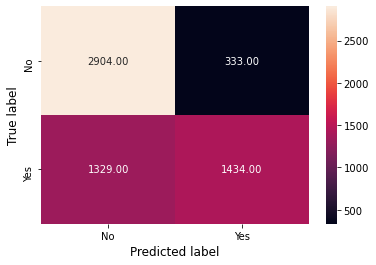

In [121]:
cm=confusion_matrix(y_test1,predictions1)
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["No", "Yes"] ,yticklabels = ["No", "Yes"])
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)

In [84]:
predict_proba = pd.DataFrame(logmodel.predict_proba(X_test))
predict_proba.head()

,0,1
0,0.075144,0.924856
1,0.738029,0.261971
2,0.121898,0.878102
3,0.765459,0.234541
4,0.717390,0.282610


In [85]:
pred_log = pd.DataFrame(predictions)

In [87]:
pred_log

,0
0,1
1,0
2,1
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,1


In [88]:
y_test_1 = y_test.reset_index()

In [91]:
y_test_1

,index,Y_var
0,6285,1
1,9283,0
2,10276,1
3,10332,1
4,13389,1
...,...,...
5995,11740,0
5996,7209,1
5997,18599,1
5998,9699,1


In [94]:
pred = pd.concat([y_test_1,pred_log,predict_proba],axis = 1)

In [95]:
pred

,index,Y_var,0,0,1
0,6285,1,1,0.075144,0.924856
1,9283,0,0,0.738029,0.261971
2,10276,1,1,0.121898,0.878102
3,10332,1,0,0.765459,0.234541
4,13389,1,0,0.717390,0.282610
...,...,...,...,...,...
5995,11740,0,0,0.646779,0.353221
5996,7209,1,0,0.653705,0.346295
5997,18599,1,0,0.721370,0.278630
5998,9699,1,1,0.064970,0.935030


In [96]:
pred.columns = ['index', 'actual', 'predicted', 'tran_0', 'tran_1']
pred.head()

,index,actual,predicted,tran_0,tran_1
0,6285,1,1,0.075144,0.924856
1,9283,0,0,0.738029,0.261971
2,10276,1,1,0.121898,0.878102
3,10332,1,0,0.765459,0.234541
4,13389,1,0,0.717390,0.282610


In [97]:
from sklearn import metrics

In [98]:
auc_score = metrics.roc_auc_score( pred.actual, pred.tran_1 )
round( float( auc_score ), 2 )

0.76

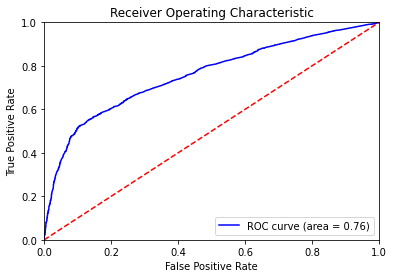

In [99]:
fpr, tpr, threshold = metrics.roc_curve(y_test,pred.tran_1,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)

# plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.plot([0,1],[0.5,0.5])
# plt.plot([0,1],[0.52,0.52])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
cutoff_prob = threshold[(np.abs(tpr - 0.52)).argmin()]
round( float( cutoff_prob ), 2 )

0.5

In [94]:
pred['new_labels'] = pred['tran_1'].map( lambda x: 1 if x >= 0.52 else 0 )
pred.head()

,index,actual,predicted,tran_0,tran_1,new_labels
0,6285,1,1,0.075144,0.924856,1
1,9283,0,0,0.738029,0.261971,0
2,10276,1,1,0.121898,0.878102,1
3,10332,1,0,0.765459,0.234541,0
4,13389,1,0,0.717390,0.282610,0


In [95]:
metrics.accuracy_score(pred.actual,pred.new_labels, [1,0] )

C:\Users\QT675QK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass normalize=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


0.7211666666666666

In [100]:
ks_chart=pred[['actual','tran_1']].copy()

In [101]:
ks_chart.head()

,actual,tran_1
0,1,0.924856
1,0,0.261971
2,1,0.878102
3,1,0.234541
4,1,0.282610


In [102]:
ks_chart.rename(columns = {'tran_1':'Prob'},inplace=True)

In [103]:
ks_chart['decile'] = pd.qcut(ks_chart['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
ks_chart.head()

,actual,Prob,decile
0,1,0.924856,10
1,0,0.261971,2
2,1,0.878102,10
3,1,0.234541,1
4,1,0.282610,3


In [105]:
ks_chart.rename(columns = {'actual':'tran_1'},inplace=True)
ks_chart['tran_0'] = 1-ks_chart['tran_1']

In [106]:
df1 = pd.pivot_table(data=ks_chart,index=['decile'],values=['tran_1','tran_0','Prob'],
                     aggfunc={'tran_1':[np.sum],
                              'tran_0':[np.sum],
                              'Prob' : [np.min,np.max]})
df1.head()

Prob           tran_0 tran_1
            amax      amin    sum    sum
decile                                  
1       0.253009  0.034367    480    120
2       0.278630  0.253188    473    152
3       0.322706  0.279472    438    186
4       0.348142  0.323396    382    169
5       0.375819  0.348411    405    205

In [107]:
df1.reset_index()

decile      Prob           tran_0 tran_1
              amax      amin    sum    sum
0      1  0.253009  0.034367    480    120
1      2  0.278630  0.253188    473    152
2      3  0.322706  0.279472    438    186
3      4  0.348142  0.323396    382    169
4      5  0.375819  0.348411    405    205
5      6  0.428014  0.375832    358    232
6      7  0.489905  0.428057    353    247
7      8  0.789425  0.489975    181    426
8      9  0.861574  0.789551     98    495
9     10  0.989151  0.861710     69    531

In [108]:
df1.columns

MultiIndex([(  'Prob', 'amax'),
            (  'Prob', 'amin'),
            ('tran_0',  'sum'),
            ('tran_1',  'sum')],
           )

In [109]:
df1.columns = ['max_score','min_score','tran_0_count','tran_1_count']
df1['Total_Cust'] = df1['tran_1_count']+df1['tran_0_count']
df1

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust
decile,,,,,
1,0.253009,0.034367,480,120,600
2,0.278630,0.253188,473,152,625
3,0.322706,0.279472,438,186,624
4,0.348142,0.323396,382,169,551
5,0.375819,0.348411,405,205,610
6,0.428014,0.375832,358,232,590
7,0.489905,0.428057,353,247,600
8,0.789425,0.489975,181,426,607
9,0.861574,0.789551,98,495,593


In [110]:
df2 = df1.sort_values(by='min_score',ascending=False)
df2

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust
decile,,,,,
10,0.989151,0.861710,69,531,600
9,0.861574,0.789551,98,495,593
8,0.789425,0.489975,181,426,607
7,0.489905,0.428057,353,247,600
6,0.428014,0.375832,358,232,590
5,0.375819,0.348411,405,205,610
4,0.348142,0.323396,382,169,551
3,0.322706,0.279472,438,186,624
2,0.278630,0.253188,473,152,625


In [111]:
df2['Default_Rate'] = (df2['tran_1_count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
tran_1_sum = df2['tran_1_count'].sum()
tran_0_sum = df2['tran_0_count'].sum()
df2['tran_1 %'] = (df2['tran_1_count']/tran_1_sum).apply('{0:.2%}'.format)
df2['tran_0 %'] = (df2['tran_0_count']/tran_0_sum).apply('{0:.2%}'.format)
df2

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %
decile,,,,,,,,
10,0.989151,0.861710,69,531,600,88.50%,19.22%,2.13%
9,0.861574,0.789551,98,495,593,83.47%,17.92%,3.03%
8,0.789425,0.489975,181,426,607,70.18%,15.42%,5.59%
7,0.489905,0.428057,353,247,600,41.17%,8.94%,10.91%
6,0.428014,0.375832,358,232,590,39.32%,8.40%,11.06%
5,0.375819,0.348411,405,205,610,33.61%,7.42%,12.51%
4,0.348142,0.323396,382,169,551,30.67%,6.12%,11.80%
3,0.322706,0.279472,438,186,624,29.81%,6.73%,13.53%
2,0.278630,0.253188,473,152,625,24.32%,5.50%,14.61%


In [112]:
df2['ks_stats'] = np.round(((df2['tran_1_count'] / df2['tran_1_count'].sum()).cumsum() -(df2['tran_0_count'] / df2['tran_0_count'].sum()).cumsum()), 4) * 100
df2

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %,ks_stats
decile,,,,,,,,,
10,0.989151,0.861710,69,531,600,88.50%,19.22%,2.13%,17.09
9,0.861574,0.789551,98,495,593,83.47%,17.92%,3.03%,31.97
8,0.789425,0.489975,181,426,607,70.18%,15.42%,5.59%,41.80
7,0.489905,0.428057,353,247,600,41.17%,8.94%,10.91%,39.84
6,0.428014,0.375832,358,232,590,39.32%,8.40%,11.06%,37.17
5,0.375819,0.348411,405,205,610,33.61%,7.42%,12.51%,32.08
4,0.348142,0.323396,382,169,551,30.67%,6.12%,11.80%,26.40
3,0.322706,0.279472,438,186,624,29.81%,6.73%,13.53%,19.60
2,0.278630,0.253188,473,152,625,24.32%,5.50%,14.61%,10.49


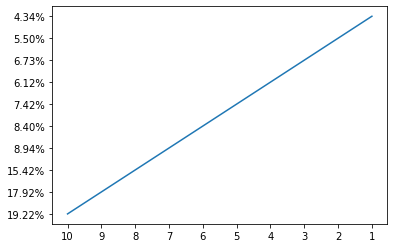

In [113]:
x=df2.reset_index()
plt.plot(x['decile'],x['tran_1 %'])

In [114]:
df2['tran_1_cum %']=np.round(((df2['tran_1_count'] / df2['tran_1_count'].sum()).cumsum()), 4) * 100
df2['tran_0_cum %']=np.round(((df2['tran_0_count'] / df2['tran_0_count'].sum()).cumsum()), 4) * 100

In [115]:
df2

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %,ks_stats,tran_1_cum %,tran_0_cum %
decile,,,,,,,,,,,
10,0.989151,0.861710,69,531,600,88.50%,19.22%,2.13%,17.09,19.22,2.13
9,0.861574,0.789551,98,495,593,83.47%,17.92%,3.03%,31.97,37.13,5.16
8,0.789425,0.489975,181,426,607,70.18%,15.42%,5.59%,41.80,52.55,10.75
7,0.489905,0.428057,353,247,600,41.17%,8.94%,10.91%,39.84,61.49,21.66
6,0.428014,0.375832,358,232,590,39.32%,8.40%,11.06%,37.17,69.89,32.72
5,0.375819,0.348411,405,205,610,33.61%,7.42%,12.51%,32.08,77.31,45.23
4,0.348142,0.323396,382,169,551,30.67%,6.12%,11.80%,26.40,83.42,57.03
3,0.322706,0.279472,438,186,624,29.81%,6.73%,13.53%,19.60,90.16,70.56
2,0.278630,0.253188,473,152,625,24.32%,5.50%,14.61%,10.49,95.66,85.17


In [116]:
df2['Base %'] = [10,20,30,40,50,60,70,80,90,100]

In [117]:
df2['lift'] = (df2['tran_1_cum %']/df2['Base %'])
df2['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
df2

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %,ks_stats,tran_1_cum %,tran_0_cum %,Base %,lift,Baseline
decile,,,,,,,,,,,,,,
10,0.989151,0.861710,69,531,600,88.50%,19.22%,2.13%,17.09,19.22,2.13,10,1.922000,1
9,0.861574,0.789551,98,495,593,83.47%,17.92%,3.03%,31.97,37.13,5.16,20,1.856500,1
8,0.789425,0.489975,181,426,607,70.18%,15.42%,5.59%,41.80,52.55,10.75,30,1.751667,1
7,0.489905,0.428057,353,247,600,41.17%,8.94%,10.91%,39.84,61.49,21.66,40,1.537250,1
6,0.428014,0.375832,358,232,590,39.32%,8.40%,11.06%,37.17,69.89,32.72,50,1.397800,1
5,0.375819,0.348411,405,205,610,33.61%,7.42%,12.51%,32.08,77.31,45.23,60,1.288500,1
4,0.348142,0.323396,382,169,551,30.67%,6.12%,11.80%,26.40,83.42,57.03,70,1.191714,1
3,0.322706,0.279472,438,186,624,29.81%,6.73%,13.53%,19.60,90.16,70.56,80,1.127000,1
2,0.278630,0.253188,473,152,625,24.32%,5.50%,14.61%,10.49,95.66,85.17,90,1.062889,1


In [118]:
df2.reset_index()

,decile,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %,ks_stats,tran_1_cum %,tran_0_cum %,Base %,lift,Baseline
0,10,0.989151,0.861710,69,531,600,88.50%,19.22%,2.13%,17.09,19.22,2.13,10,1.922000,1
1,9,0.861574,0.789551,98,495,593,83.47%,17.92%,3.03%,31.97,37.13,5.16,20,1.856500,1
2,8,0.789425,0.489975,181,426,607,70.18%,15.42%,5.59%,41.80,52.55,10.75,30,1.751667,1
3,7,0.489905,0.428057,353,247,600,41.17%,8.94%,10.91%,39.84,61.49,21.66,40,1.537250,1
4,6,0.428014,0.375832,358,232,590,39.32%,8.40%,11.06%,37.17,69.89,32.72,50,1.397800,1
5,5,0.375819,0.348411,405,205,610,33.61%,7.42%,12.51%,32.08,77.31,45.23,60,1.288500,1
6,4,0.348142,0.323396,382,169,551,30.67%,6.12%,11.80%,26.40,83.42,57.03,70,1.191714,1
7,3,0.322706,0.279472,438,186,624,29.81%,6.73%,13.53%,19.60,90.16,70.56,80,1.127000,1
8,2,0.278630,0.253188,473,152,625,24.32%,5.50%,14.61%,10.49,95.66,85.17,90,1.062889,1
9,1,0.253009,0.034367,480,120,600,20.00%,4.34%,14.83%,0.00,100.00,100.00,100,1.000000,1


In [123]:
predict_proba1 = pd.DataFrame(logmodel1.predict_proba(X_test1))
predict_proba1.head()

,0,1
0,0.073184,0.926816
1,0.734164,0.265836
2,0.124959,0.875041
3,0.759460,0.240540
4,0.702822,0.297178


In [124]:
pred_log1 = pd.DataFrame(predictions1)

In [125]:
y_test_11 = y_test1.reset_index()

In [126]:
pred1 = pd.concat([y_test_11,pred_log1,predict_proba1],axis = 1)

In [128]:
pred1.columns = ['index', 'actual', 'predicted', 'tran_0', 'tran_1']
pred1.head()

,index,actual,predicted,tran_0,tran_1
0,6285,1,1,0.073184,0.926816
1,9283,0,0,0.734164,0.265836
2,10276,1,1,0.124959,0.875041
3,10332,1,0,0.759460,0.240540
4,13389,1,0,0.702822,0.297178


In [129]:
ks_chart1=pred1[['actual','tran_1']].copy()
ks_chart1.rename(columns = {'tran_1':'Prob'},inplace=True)
ks_chart1['decile'] = pd.qcut(ks_chart1['Prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
ks_chart1.head()

,actual,Prob,decile
0,1,0.926816,10
1,0,0.265836,2
2,1,0.875041,10
3,1,0.240540,1
4,1,0.297178,3


In [130]:
ks_chart1.rename(columns = {'actual':'tran_1'},inplace=True)
ks_chart1['tran_0'] = 1-ks_chart1['tran_1']
df11 = pd.pivot_table(data=ks_chart1,index=['decile'],values=['tran_1','tran_0','Prob'],
                     aggfunc={'tran_1':[np.sum],
                              'tran_0':[np.sum],
                              'Prob' : [np.min,np.max]})
df11.head()

Prob           tran_0 tran_1
            amax      amin    sum    sum
decile                                  
1       0.248452  0.031630    476    124
2       0.283949  0.248487    501    161
3       0.320766  0.284310    444    179
4       0.345601  0.320848    353    163
5       0.377062  0.345930    403    196

In [131]:
df11.columns = ['max_score','min_score','tran_0_count','tran_1_count']
df11['Total_Cust'] = df11['tran_1_count']+df11['tran_0_count']
df11

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust
decile,,,,,
1,0.248452,0.031630,476,124,600
2,0.283949,0.248487,501,161,662
3,0.320766,0.284310,444,179,623
4,0.345601,0.320848,353,163,516
5,0.377062,0.345930,403,196,599
6,0.422616,0.377228,386,250,636
7,0.491123,0.423332,324,240,564
8,0.787906,0.491270,181,420,601
9,0.860394,0.788589,102,497,599


In [132]:
df21 = df11.sort_values(by='min_score',ascending=False)
df21

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust
decile,,,,,
10,0.989974,0.860538,67,533,600
9,0.860394,0.788589,102,497,599
8,0.787906,0.491270,181,420,601
7,0.491123,0.423332,324,240,564
6,0.422616,0.377228,386,250,636
5,0.377062,0.345930,403,196,599
4,0.345601,0.320848,353,163,516
3,0.320766,0.284310,444,179,623
2,0.283949,0.248487,501,161,662


In [133]:
df21['Default_Rate'] = (df21['tran_1_count'] / df21['Total_Cust']).apply('{0:.2%}'.format)
tran_1_sum1 = df21['tran_1_count'].sum()
tran_0_sum1 = df21['tran_0_count'].sum()
df21['tran_1 %'] = (df21['tran_1_count']/tran_1_sum1).apply('{0:.2%}'.format)
df21['tran_0 %'] = (df21['tran_0_count']/tran_0_sum1).apply('{0:.2%}'.format)
df21

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %
decile,,,,,,,,
10,0.989974,0.860538,67,533,600,88.83%,19.29%,2.07%
9,0.860394,0.788589,102,497,599,82.97%,17.99%,3.15%
8,0.787906,0.491270,181,420,601,69.88%,15.20%,5.59%
7,0.491123,0.423332,324,240,564,42.55%,8.69%,10.01%
6,0.422616,0.377228,386,250,636,39.31%,9.05%,11.92%
5,0.377062,0.345930,403,196,599,32.72%,7.09%,12.45%
4,0.345601,0.320848,353,163,516,31.59%,5.90%,10.91%
3,0.320766,0.284310,444,179,623,28.73%,6.48%,13.72%
2,0.283949,0.248487,501,161,662,24.32%,5.83%,15.48%


In [134]:
df21['ks_stats'] = np.round(((df21['tran_1_count'] / df21['tran_1_count'].sum()).cumsum() -(df21['tran_0_count'] / df21['tran_0_count'].sum()).cumsum()), 4) * 100
df21

,max_score,min_score,tran_0_count,tran_1_count,Total_Cust,Default_Rate,tran_1 %,tran_0 %,ks_stats
decile,,,,,,,,,
10,0.989974,0.860538,67,533,600,88.83%,19.29%,2.07%,17.22
9,0.860394,0.788589,102,497,599,82.97%,17.99%,3.15%,32.06
8,0.787906,0.491270,181,420,601,69.88%,15.20%,5.59%,41.67
7,0.491123,0.423332,324,240,564,42.55%,8.69%,10.01%,40.34
6,0.422616,0.377228,386,250,636,39.31%,9.05%,11.92%,37.47
5,0.377062,0.345930,403,196,599,32.72%,7.09%,12.45%,32.11
4,0.345601,0.320848,353,163,516,31.59%,5.90%,10.91%,27.11
3,0.320766,0.284310,444,179,623,28.73%,6.48%,13.72%,19.87
2,0.283949,0.248487,501,161,662,24.32%,5.83%,15.48%,10.22
